With the 2015 NBA Draft in the books (#knickstaps) I wanted to take a look at some data from previous drafts and explore it as means of learning some Python and some of its libraries.

Now we'll be taking a look at the NBA draft data we scraped in the previous post.  We'll be using `pandas` to read in our data and manipulate it.  Then we will use `matplotlib` and `seaborn` to create some visualizations from the data. 

Lets import the libraries we need.

**NOTE**: There will be alot of repeated code, which obviously the violates [DRY](https://en.wikipedia.org/wiki/Don't_repeat_yourself) principle.

In [1]:
import pandas as pd
import numpy as np

# we need this 'magic function to plot within ipython notebook
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

###Read in the CSV file

`pandas` allows us to easily read in CSV files using `read_csv`. The `index_col` parameter allows us to set the column that will act as the names for our rows.  In our CSV that is the first column.

In [2]:
draft_df = pd.read_csv("draft_data_1966_to_2014.csv", index_col=0)

Lets take a look at the data.

In [3]:
draft_df.head()

,Draft_Yr,Pk,Tm,Player,College,Yrs,G,MP,PTS,TRB,...,3P_Perc,FT_Perc,MP_per_G,PTS_per_G,TRB_per_G,AST_per_G,WS,WS_per_48,BPM,VORP
0,1966,1,NYK,Cazzie Russell,University of Michigan,12,817,22213,12377,3068,...,0,0.827,27.2,15.1,3.8,2.2,51.7,0.112,-2.0,0.1
1,1966,2,DET,Dave Bing,Syracuse University,12,901,32769,18327,3420,...,0,0.775,36.4,20.3,3.8,6.0,68.8,0.101,0.6,8.5
2,1966,3,SFW,Clyde Lee,Vanderbilt University,10,742,19885,5733,7626,...,0,0.614,26.8,7.7,10.3,1.1,33.5,0.081,-2.4,-0.6
3,1966,4,STL,Lou Hudson,University of Minnesota,13,890,29794,17940,3926,...,0,0.797,33.5,20.2,4.4,2.7,81.0,0.131,0.1,5.9
4,1966,5,BAL,Jack Marin,Duke University,11,849,24590,12541,4405,...,0,0.843,29.0,14.8,5.2,2.1,59.3,0.116,-2.8,-1.4


In [4]:
draft_df.tail()

,Draft_Yr,Pk,Tm,Player,College,Yrs,G,MP,PTS,TRB,...,3P_Perc,FT_Perc,MP_per_G,PTS_per_G,TRB_per_G,AST_per_G,WS,WS_per_48,BPM,VORP
6445,2014,56,DEN,Roy Devyn Marble,University of Iowa,1,16,208,37,31,...,0.182,0.313,13.0,2.3,1.9,1.1,-0.1,-0.031,-4.5,-0.1
6446,2014,57,IND,Louis Labeyrie,NaN,0,0,0,0,0,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0
6447,2014,58,SAS,Jordan McRae,University of Tennessee,0,0,0,0,0,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0
6448,2014,59,TOR,Xavier Thames,San Diego State University,0,0,0,0,0,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0
6449,2014,60,SAS,Cory Jefferson,Baylor University,1,50,531,183,145,...,0.133,0.574,10.6,3.7,2.9,0.3,0.8,0.071,-3.7,-0.2


In [5]:
draft_df.dtypes

Draft_Yr       int64
Pk             int64
Tm            object
Player        object
College       object
Yrs            int64
G              int64
MP             int64
PTS            int64
TRB            int64
AST            int64
FG_Perc      float64
3P_Perc      float64
FT_Perc      float64
MP_per_G     float64
PTS_per_G    float64
TRB_per_G    float64
AST_per_G    float64
WS           float64
WS_per_48    float64
BPM          float64
VORP         float64
dtype: object

Lets look at a few summary statistics using `describe`. 

In [6]:
draft_df.describe()

,Draft_Yr,Pk,Yrs,G,MP,PTS,TRB,AST,FG_Perc,3P_Perc,FT_Perc,MP_per_G,PTS_per_G,TRB_per_G,AST_per_G,WS,WS_per_48,BPM,VORP
count,5868.000000,5868.000000,5868.000000,5868.000000,5868.000000,5868.000000,5868.000000,5868.000000,5868.000000,5868.000000,5868.000000,5868.000000,5868.000000,5868.000000,5868.000000,5868.000000,5868.000000,5868.000000,5868.000000
mean,1983.153033,81.589980,2.609407,148.226483,3587.682004,1535.693933,649.459952,345.194274,0.188203,0.075082,0.298985,7.567144,3.026943,1.348807,0.678459,7.603050,0.023319,-1.114025,1.807941
std,12.760479,60.990659,4.247474,274.421227,7742.299563,3692.162233,1578.298098,950.648127,0.222286,0.138717,0.358721,10.476943,4.723596,2.107614,1.254241,20.664087,0.071398,3.040026,7.588628
min,1966.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.500000,-1.264000,-53.600000,-8.300000
25%,1973.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.400000,0.000000
50%,1981.000000,63.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1989.000000,130.000000,4.000000,151.000000,2244.000000,767.500000,349.500000,147.250000,0.432000,0.095500,0.703000,14.525000,4.900000,2.200000,0.900000,2.100000,0.055000,0.000000,0.000000
max,2014.000000,239.000000,21.000000,1611.000000,57446.000000,38387.000000,17440.000000,15806.000000,1.000000,1.000000,1.000000,41.100000,30.100000,14.000000,11.200000,273.400000,1.442000,19.600000,104.400000


Lets get the average Win Shares per 48 minutes for the 1966 draft. To do that we need to apply the Boolean operation 

        draft_df['Draft_Yr'] == 1 
        
to our *draft_df*, which returns a `DataFrame` containing data for the 1966 draft. We then grab its *WS_per_48* column and call the `mean()` method.

In [7]:
draft_df[draft_df['Draft_Yr'] == 1966]['WS_per_48'].mean()

0.012830357142857145

There are alot of different ways to index and slice data using `pandas` I suggest reading the [documentation](http://pandas.pydata.org/pandas-docs/stable/indexing.html).

Now that we can get the *WS_per_48* mean for one year lets get it for every year.

In [8]:
# draft_df.Draft_Yr.unique() contains all the years
# in out DataFrame
WS48_yrly_avg = [draft_df[draft_df['Draft_Yr']==yr]['WS_per_48'].mean()
                 for yr in draft_df.Draft_Yr.unique() ]
WS48_yrly_avg

[0.012830357142857145,
 0.0070493827160493846,
 0.0058691588785046728,
 0.015862385321100916,
 0.0092887029288702943,
 0.0092151898734177222,
 0.011747474747474746,
 0.012056872037914692,
 0.018758426966292135,
 0.01749425287356322,
 0.015890173410404627,
 0.015005882352941174,
 0.019410891089108911,
 0.011841584158415842,
 0.010051401869158878,
 0.017910313901345291,
 0.014582222222222222,
 0.011938053097345133,
 0.013162280701754387,
 0.02588271604938272,
 0.01873456790123457,
 0.014509316770186334,
 0.021013333333333335,
 0.052796296296296313,
 0.056166666666666663,
 0.070203703703703699,
 0.055888888888888877,
 0.04225925925925926,
 0.054518518518518515,
 0.039051724137931045,
 0.058137931034482754,
 0.054578947368421046,
 0.075724137931034483,
 0.054551724137931031,
 0.043396551724137929,
 0.045807017543859643,
 0.049684210526315789,
 0.041465517241379313,
 0.043338983050847456,
 0.05361666666666666,
 0.053816666666666672,
 0.051816666666666657,
 0.06621666666666666,
 0.0663666666

In [9]:
type(WS48_yrly_avg)

list

Another way we wan get the above information is by using `groupby` which would allow us to group our data by draft year and then find the mean WS/48 for each year.  

In [10]:
WS48_yrly_avg = draft_df.groupby('Draft_Yr').WS_per_48.mean()
WS48_yrly_avg  # this is a pandas Series not a list

Draft_Yr
1966    0.012830
1967    0.007049
1968    0.005869
1969    0.015862
1970    0.009289
1971    0.009215
1972    0.011747
1973    0.012057
1974    0.018758
1975    0.017494
1976    0.015890
1977    0.015006
1978    0.019411
1979    0.011842
1980    0.010051
1981    0.017910
1982    0.014582
1983    0.011938
1984    0.013162
1985    0.025883
1986    0.018735
1987    0.014509
1988    0.021013
1989    0.052796
1990    0.056167
1991    0.070204
1992    0.055889
1993    0.042259
1994    0.054519
1995    0.039052
1996    0.058138
1997    0.054579
1998    0.075724
1999    0.054552
2000    0.043397
2001    0.045807
2002    0.049684
2003    0.041466
2004    0.043339
2005    0.053617
2006    0.053817
2007    0.051817
2008    0.066217
2009    0.066367
2010    0.044583
2011    0.060383
2012    0.039100
2013    0.035567
2014    0.009617
Name: WS_per_48, dtype: float64

In [11]:
type(WS48_yrly_avg) 

pandas.core.series.Series

###Visualizing the Draft

We can now take *WS48_yrly_avg* and plot it using `matplotlib` and `seaborn`.

When creating plots, less is more.  So no unnecessary 3D effects, labels, colors, or borders.

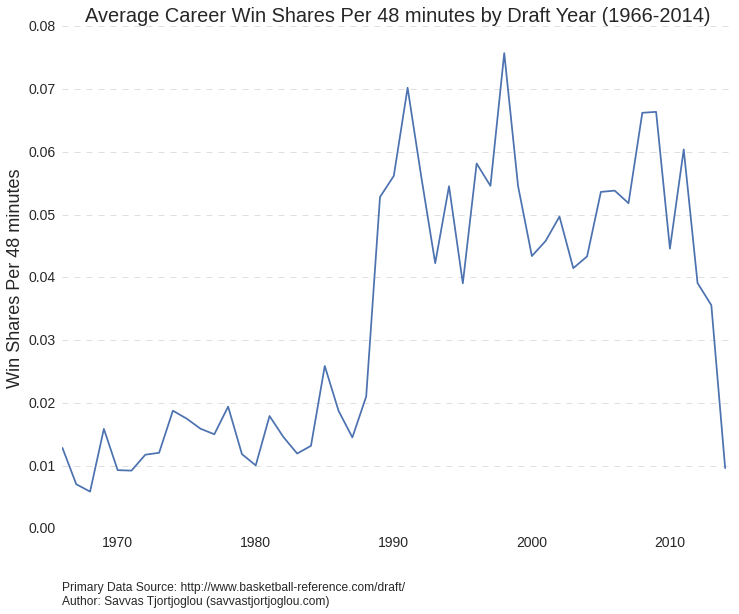

In [12]:
# Plot WS/48 by year

# use seaborn to set our graphing style
# the style 'white' creates a white background for
# our graph
sns.set_style("white")  

# Set the size to have a width of 12 inches
# and height of 9
plt.figure(figsize=(12,9))

# get the x and y values
x_values = draft_df.Draft_Yr.unique()  
y_values = WS48_yrly_avg

# add a title
title = ('Average Career Win Shares Per 48 minutes by Draft Year (1966-2014)')
plt.title(title, fontsize=20)

# Label the y-axis
# We don't need to label the year values
plt.ylabel('Win Shares Per 48 minutes', fontsize=18)

# Limit the range of the axis labels to only
# show where the data is. This helps to avoid
# unnecessary whitespace.
plt.xlim(1966, 2014.5)
plt.ylim(0, 0.08)

# Create a series of grey dashed lines across the each
# labled y-value of the graph
plt.grid(axis='y',color='grey', linestyle='--', lw=0.5, alpha=0.5)

# Change the size of tick labels for both axis
# to a more readable font size
plt.tick_params(axis='both', labelsize=14)
  
# get rid of borders for our graph using seaborn's
# despine function
sns.despine(left=True, bottom=True) 

# plot the line for our graph
plt.plot(x_values, y_values)

# Provide a reference to data source and credit yourself
# by adding text to the bottom of the graph
# the first 2 arguments are the x and y axis coordinates of where
# we want to place the text
# The coordinates given below should place the text below
# the xlabel and aligned left against the y-axis
plt.text(1966, -0.012,
         'Primary Data Source: http://www.basketball-reference.com/draft/'
         '\nAuthor: Savvas Tjortjoglou (savvastjortjoglou.com)',
          fontsize=12)

# Display our graph
plt.show()

The huge jump in WS/48 coincides with the change to a two round draft format in 1989.  So it makes sense to see the jump in average WS/48 as better players now made up a higher percentage of the total players drafted.

Lets take a look at how the number of players drafted has changed over time.  First we need to calculate the number of players drafted by year then replace the *y_value* variable, from the above code, with those values.

In [13]:
players_drafted = draft_df.groupby('Draft_Yr').Pk.count()
players_drafted

Draft_Yr
1966    112
1967    162
1968    214
1969    218
1970    239
1971    237
1972    198
1973    211
1974    178
1975    174
1976    173
1977    170
1978    202
1979    202
1980    214
1981    223
1982    225
1983    226
1984    228
1985    162
1986    162
1987    161
1988     75
1989     54
1990     54
1991     54
1992     54
1993     54
1994     54
1995     58
1996     58
1997     57
1998     58
1999     58
2000     58
2001     57
2002     57
2003     58
2004     59
2005     60
2006     60
2007     60
2008     60
2009     60
2010     60
2011     60
2012     60
2013     60
2014     60
Name: Pk, dtype: int64

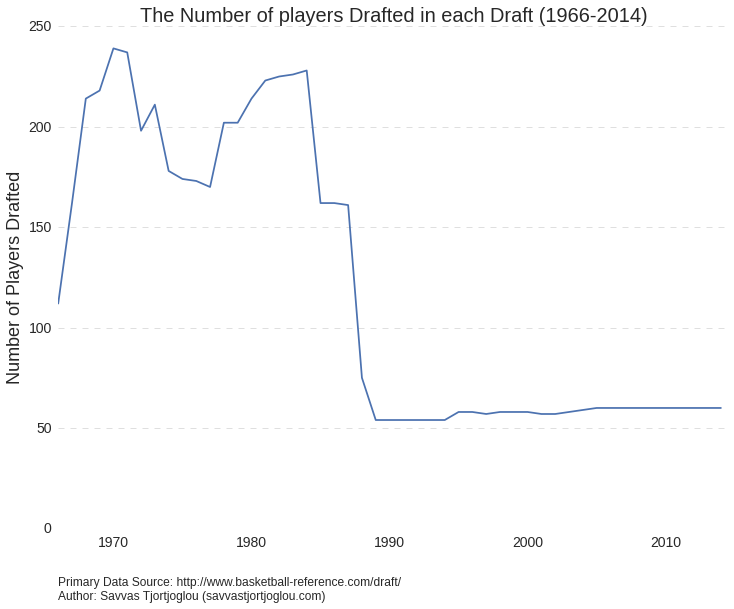

In [14]:
sns.set_style("white")  
plt.figure(figsize=(12,9))
x_values = draft_df.Draft_Yr.unique()  
y_values = players_drafted
title = ('The Number of players Drafted in each Draft (1966-2014)')
plt.title(title, fontsize=20)
plt.ylabel('Number of Players Drafted', fontsize=18)
plt.xlim(1966, 2014.5)
plt.ylim(0, 250)
plt.grid(axis='y',color='grey', linestyle='--', lw=0.5, alpha=0.5)
plt.tick_params(axis='both', labelsize=14) 
sns.despine(left=True, bottom=True) 
plt.plot(x_values, y_values)
plt.text(1966, -35,
         'Primary Data Source: http://www.basketball-reference.com/draft/'
         '\nAuthor: Savvas Tjortjoglou (savvastjortjoglou.com)',
          fontsize=12)
plt.show()

Lets plot both of those plots in one plot with 2 y-axis labels. To do this we can use the `matploltlib` `Figure` object and an array of (or single) `Axes` objects that the `plt.subplots()` method returns us. We can access some of the plot elements, like our x-axis and y-axis, that we want to customize through the `Axes` objects.  To create the two different plots we will create two different `Axes` objects and call the `plot` method from each of them.

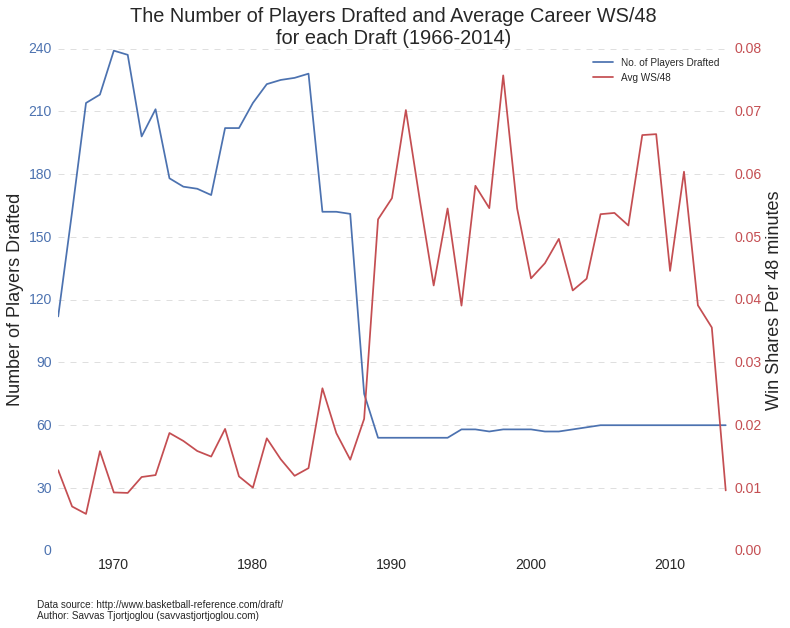

In [15]:
sns.set_style("white")  

# change the mapping of default matplotlib color shorthands (like 'b' 
# or 'r') to default seaborn palette 
sns.set_color_codes()

# set the x and y values for our first line
x_values = draft_df.Draft_Yr.unique() 
y_values_1 = players_drafted

# plt.subplots returns a tuple containing a Figure and an Axes
# fig is a Figure object and ax1 is an Axes object
# we can also set the size of our plot
fig, ax1 = plt.subplots(figsize=(12,9))  

title = ('The Number of Players Drafted and Average Career WS/48'
         '\nfor each Draft (1966-2014)')
plt.title(title, fontsize=20)
# plt.xlabel('Draft Pick', fontsize=16)

# Create a series of grey dashed lines across the each
# labled y-value of the graph
plt.grid(axis='y',color='grey', linestyle='--', lw=0.5, alpha=0.5)

# Change the size of tick labels for x-axis and left y-axis
# to a more readable font size for
plt.tick_params(axis='both', labelsize=14)

# Plot our first line with deals with career WS/48 per draft
# We assign it to plot 1 to reference later for our legend
# We alse give it a label, in order to use for our legen
plot1 = ax1.plot(x_values, y_values_1, 'b', label='No. of Players Drafted')
# Create the ylabel for our WS/48 line
ax1.set_ylabel('Number of Players Drafted', fontsize=18)
# Set limits for 1st y-axis
ax1.set_ylim(0, 240)
# Have tick color match corrsponding line color
for tl in ax1.get_yticklabels():
    tl.set_color('b')

# Now we create the our 2nd Axes object that will share the same x-axis
# To do this we call the twinx() method from our first Axes object
ax2 = ax1.twinx()
y_values_2 = WS48_yrly_avg
# Create our second line for the number of picks by year
plot2 = ax2.plot(x_values, y_values_2, 'r', 
                 label='Avg WS/48')
# Create our label for the 2nd y-axis
ax2.set_ylabel('Win Shares Per 48 minutes', fontsize=18)
# Set the limit for 2nd y-axis
ax2.set_ylim(0, 0.08)
# Set tick size for second y-axis
ax2.tick_params(axis='y', labelsize=14)
# Have tick color match corresponding line color
for tl in ax2.get_yticklabels():
    tl.set_color('r')

# Limit our x-axis values to minimize white space
ax2.set_xlim(1966, 2014.15)

# create our legend 
# First add our lines together
lines = plot1 + plot2
# Then create legend by calling legend and getting the label for each line
ax1.legend(lines, [l.get_label() for l in lines])

# Create evenly ligned up tick marks for both y-axis
# np.linspace allows us to get evenly spaced numbers over
# the specified interval given by first 2 arguments,
# Those 2 arguments are the the outer bounds of the y-axis values
# the third argument is the number of values we want to create
# ax1 - create 9 tick values from 0 to 240
ax1.set_yticks(np.linspace(ax1.get_ybound()[0], ax1.get_ybound()[1], 9))
# ax2 - create 9 tick values from 0.00 to 0.08
ax2.set_yticks(np.linspace(ax2.get_ybound()[0], ax2.get_ybound()[1], 9))

# need to get rid of spines for each Axes object
for ax in [ax1, ax2]:
    ax.spines["top"].set_visible(False)  
    ax.spines["bottom"].set_visible(False)  
    ax.spines["right"].set_visible(False)  
    ax.spines["left"].set_visible(False)  
    
# Create text by calling the text() method from our figure object    
fig.text(0.1, 0.02,
         'Data source: http://www.basketball-reference.com/draft/'
        '\nAuthor: Savvas Tjortjoglou (savvastjortjoglou.com)',
          fontsize=10)

plt.show()

Lets create a `DataFrame` of just the top 60 picks, and then grab the data we need to plot. Note Drafts from 1989 to 2004 dont have a minimum of 60 draft picks.

In [16]:
top60 = draft_df[(draft_df['Pk'] < 61)]
top60_yrly_WS48 = top60.groupby('Draft_Yr').WS_per_48.mean()
top60_yrly_WS48

Draft_Yr
1966    0.021383
1967    0.018367
1968    0.021033
1969    0.044900
1970    0.036233
1971    0.030667
1972    0.028550
1973    0.041717
1974    0.057617
1975    0.037833
1976    0.044033
1977    0.051517
1978    0.051483
1979    0.033100
1980    0.034167
1981    0.050200
1982    0.048250
1983    0.052000
1984    0.046250
1985    0.048267
1986    0.037667
1987    0.032417
1988    0.023367
1989    0.052796
1990    0.056167
1991    0.070204
1992    0.055889
1993    0.042259
1994    0.054519
1995    0.039052
1996    0.058138
1997    0.054579
1998    0.075724
1999    0.054552
2000    0.043397
2001    0.045807
2002    0.049684
2003    0.041466
2004    0.043339
2005    0.053617
2006    0.053817
2007    0.051817
2008    0.066217
2009    0.066367
2010    0.044583
2011    0.060383
2012    0.039100
2013    0.035567
2014    0.009617
Name: WS_per_48, dtype: float64

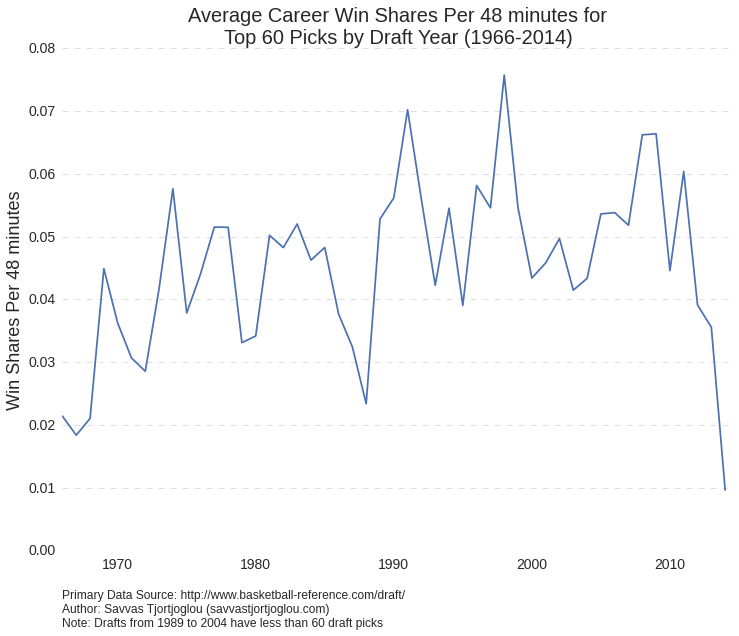

In [17]:
sns.set_style("white")  

plt.figure(figsize=(12,9))
x_values = draft_df.Draft_Yr.unique() 
y_values = top60_yrly_WS48
title = ('Average Career Win Shares Per 48 minutes for'
         '\nTop 60 Picks by Draft Year (1966-2014)')
plt.title(title, fontsize=20)
plt.ylabel('Win Shares Per 48 minutes', fontsize=18)
plt.xlim(1966, 2014.5)
plt.ylim(0, 0.08)
plt.grid(axis='y',color='grey', linestyle='--', lw=0.5, alpha=0.5)
plt.tick_params(axis='both', labelsize=14)
sns.despine(left=True, bottom=True) 
plt.plot(x_values, y_values)
plt.text(1966, -0.012,
         'Primary Data Source: http://www.basketball-reference.com/draft/'
         '\nAuthor: Savvas Tjortjoglou (savvastjortjoglou.com)'
         '\nNote: Drafts from 1989 to 2004 have less than 60 draft picks',
          fontsize=12)
plt.show()

###Bar Plots
Lets plot the average WS/48 by Pick for the top 60 picks.

In [18]:
top60_mean_WS48 = top60.groupby('Pk').WS_per_48.mean()
top60_mean_WS48

Pk
1     0.128898
2     0.101449
3     0.102939
4     0.097224
5     0.096837
6     0.079755
7     0.072571
8     0.078551
9     0.087510
10    0.080918
11    0.075286
12    0.066571
13    0.080041
14    0.056551
15    0.056796
16    0.050122
17    0.051918
18    0.066429
19    0.046531
20    0.049367
21    0.045204
22    0.049918
23    0.058020
24    0.057041
25    0.049837
26    0.047551
27    0.053735
28    0.029020
29    0.047082
30    0.030939
31    0.042041
32    0.044939
33    0.042224
34    0.029612
35    0.029041
36    0.036490
37    0.027224
38    0.012653
39    0.025653
40    0.023735
41    0.010551
42    0.018571
43    0.005510
44    0.023694
45    0.038755
46    0.035041
47    0.054796
48    0.019571
49    0.016163
50    0.016490
51    0.000918
52    0.010816
53    0.005245
54    0.021265
55   -0.016558
56    0.030605
57    0.022233
58    0.018500
59   -0.003765
60    0.018303
Name: WS_per_48, dtype: float64

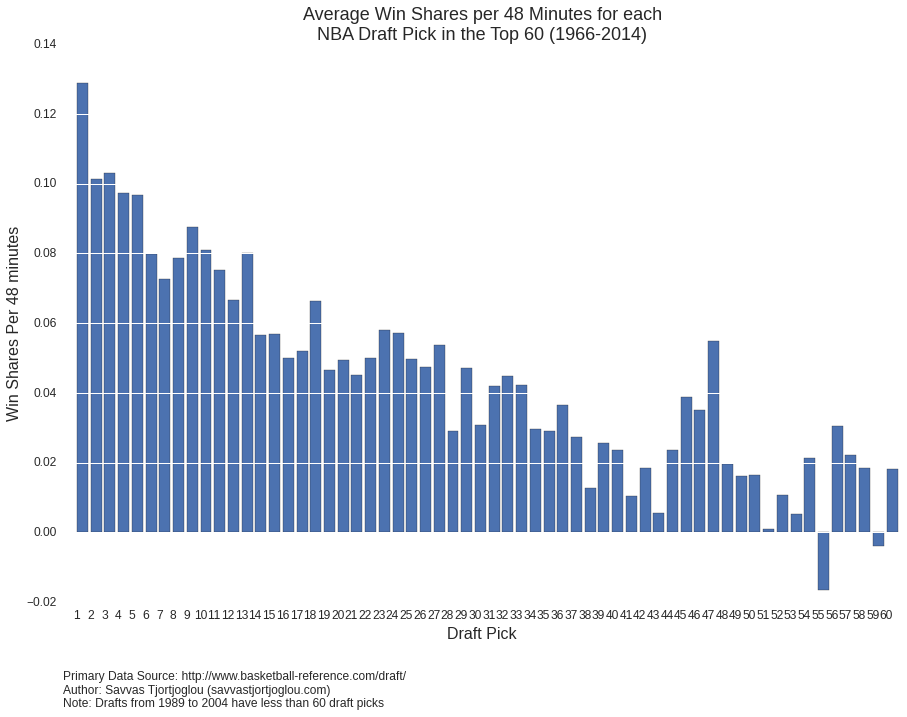

In [19]:
sns.set_style("white")  

# set the x and y values
x_values = top60.Pk.unique()
y_values = top60_mean_WS48

fig, ax = plt.subplots(figsize=(15,10))  
title = ('Average Win Shares per 48 Minutes for each' 
         '\nNBA Draft Pick in the Top 60 (1966-2014)')
ax.set_title(title, fontsize=18)
ax.set_xlabel('Draft Pick', fontsize=16)
ax.set_ylabel('Win Shares Per 48 minutes', fontsize=16)
ax.tick_params(axis='both', labelsize=12)
ax.set_xlim(0,61) 
ax.set_xticks(np.arange(1,61)) # label the tick marks
# create white y-axis grid lines to 
ax.yaxis.grid(color='white')
# overlay the white grid line on top of the bars
ax.set_axisbelow(False)
# Now add the bars to our plot
# this is equivalent to plt.bar(x_values, y_values)
ax.bar(x_values, y_values)
sns.despine(left=True, bottom=True) 
plt.text(0, -.05, 
         'Primary Data Source: http://www.basketball-reference.com/draft/'
         '\nAuthor: Savvas Tjortjoglou (savvastjortjoglou.com)'
         '\nNote: Drafts from 1989 to 2004 have less than 60 draft picks',
          fontsize=12)
plt.show()

Lets plot the same information as above but as a horizontal bar plot, which will give us better spacing for our tick labels.

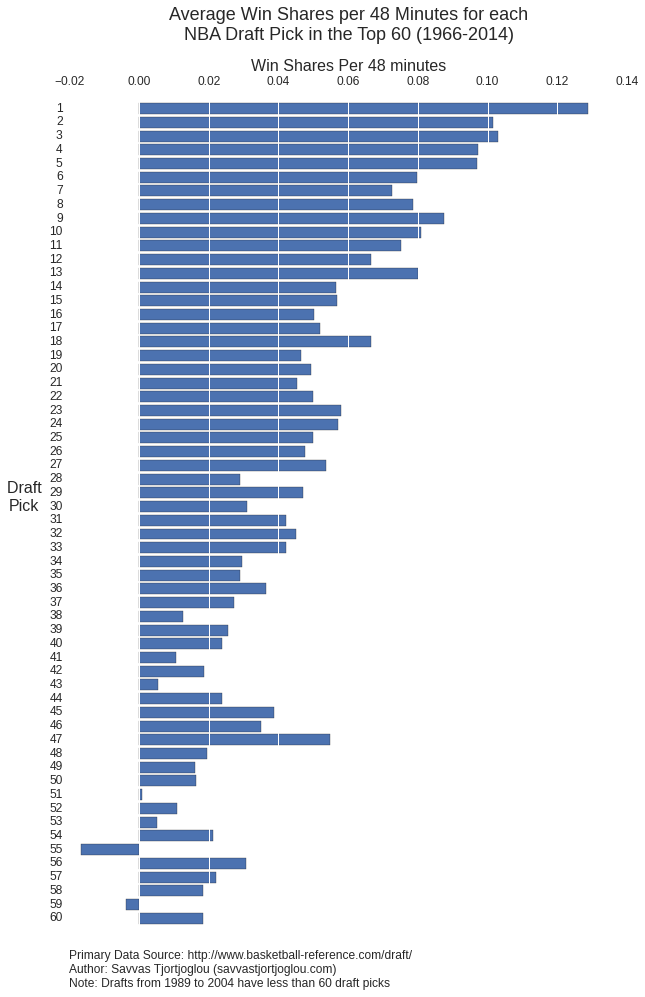

In [20]:
sns.set_style("white")  

# Note we flipped the value variable names
y_values = top60.Pk.unique()
x_values = top60_mean_WS48

fig, ax = plt.subplots(figsize=(10,15))  
title = ('Average Win Shares per 48 Minutes for each' 
         '\nNBA Draft Pick in the Top 60 (1966-2014)')
# Add title with space below for x-axix ticks and label
ax.set_title(title, fontsize=18, y=1.06)
ax.set_ylabel('Draft \nPick', fontsize=16, rotation=0)
ax.set_xlabel('Win Shares Per 48 minutes', fontsize=16)
ax.tick_params(axis='both', labelsize=12)

# set a limit for our y-axis so that we start from pick 1 at the top
ax.set_ylim(61,0)
# Show all values for draft picks
ax.set_yticks(np.arange(1,61))
# pad the y-axis label to not overlap tick labels
ax.yaxis.labelpad = 25

# Move x-axis ticks and label to the top
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')

# create white x-axis grid lines to 
ax.xaxis.grid(color='white')

# overlay the white grid line on top of the bars
ax.set_axisbelow(False)

# Now add the horizontal bars to our plot, 
# and align them centerd with ticks
ax.barh(y_values, x_values, align='center')

# get rid of borders for our graph
# Not using sns.despine as I get an issue with displaying
# the x-axis at the top of the graph
ax.spines["top"].set_visible(False)  
ax.spines["bottom"].set_visible(False)  
ax.spines["right"].set_visible(False)  
ax.spines["left"].set_visible(False)

plt.text(-0.02, 65, 
         'Primary Data Source: http://www.basketball-reference.com/draft/'
         '\nAuthor: Savvas Tjortjoglou (savvastjortjoglou.com)'
         '\nNote: Drafts from 1989 to 2004 have less than 60 draft picks',
          fontsize=12)

plt.show()

###Dot Plots/Point Plots
Instead of using a bar plot we can use a dot plot or point plot to represent the above information.

`seaborn` allows us to create point plots using `pointplot`.

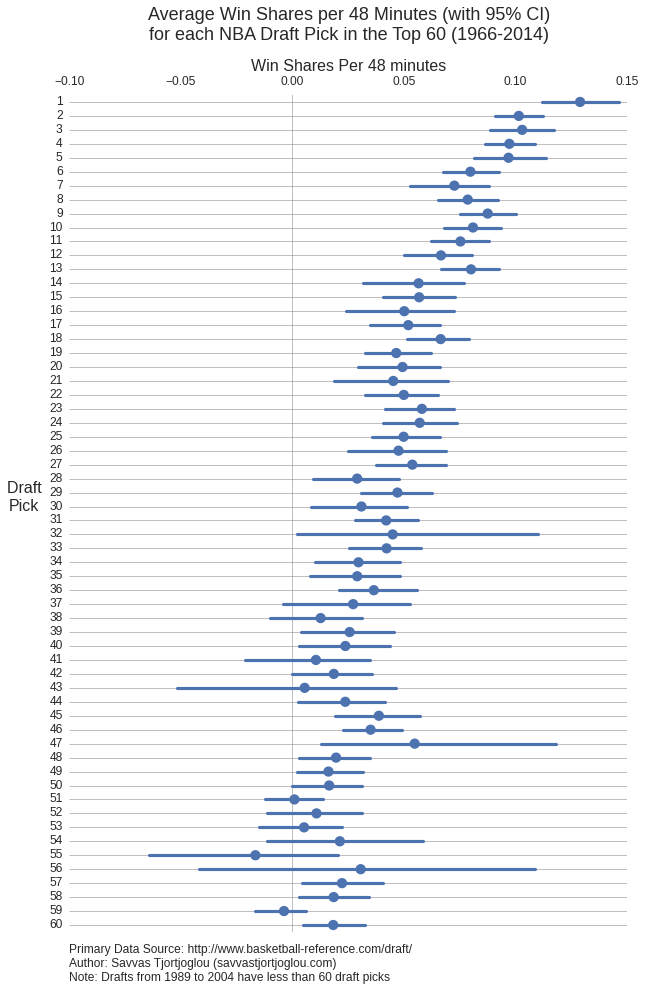

In [21]:
sns.set_style("white")  

# fig, ax = plt.subplots(figsize=(10,15))

plt.figure(figsize=(10,15))

# Create Axes object with pointplot drawn on
# This pointpolt by default retuns the mean along with a confidence
# intervals drawn, default returns 95 CI
ax = sns.pointplot(x='WS_per_48', y='Pk', join=False, data=top60, 
                   orient='h')#, ci=None)

title = ('Average Win Shares per 48 Minutes (with 95% CI)' 
         '\nfor each NBA Draft Pick in the Top 60 (1966-2014)')
# Add title with space below for x-axix ticks and label
ax.set_title(title, fontsize=18, y=1.06)
ax.set_ylabel('Draft \nPick', fontsize=16, rotation=0) # rota
ax.set_xlabel('Win Shares Per 48 minutes', fontsize=16)
ax.tick_params(axis='both', labelsize=12)

# set a limit for our y-axis so that we start from pick 1 at the top
# ax.set_ylim(61,0)
# Show all values for draft picks
# ax.set_yticks(np.arange(1,61))
# pad the y-axis label to not overlap tick labels
ax.yaxis.labelpad = 25

# limit x-axis
ax.set_xlim(-0.1, 0.15)
# Move x-axis ticks and label to the top
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')

# add horizontal lines for each draft pick
for y in range(len(y_values)):
    ax.hlines(y, -0.1, 0.15, color='grey', 
              linestyle='-', lw=0.5)
    
# Add a vertical line at 0.00 WS/48
ax.vlines(0.00, -1, 60, color='grey', linestyle='-', lw=0.5)

# get rid of borders for our graph
# Not using sns.despine as I get an issue with displaying
# the x-axis at the top of the graph
ax.spines["top"].set_visible(False)  
ax.spines["bottom"].set_visible(False)  
ax.spines["right"].set_visible(False)  
ax.spines["left"].set_visible(False)

plt.text(-0.1, 63, 
         'Primary Data Source: http://www.basketball-reference.com/draft/'
         '\nAuthor: Savvas Tjortjoglou (savvastjortjoglou.com)'
         '\nNote: Drafts from 1989 to 2004 have less than 60 draft picks',
          fontsize=12)

plt.show()

###Box Plots

To create a boxplot using `seaborn` all we have to do is use `seaborn.boxpolot`, which returns us an `Axes` object with the boxpolot drawn onto it.

Lets take a look at the WS/48 for the top 30 picks using boxplots.

In [22]:
top30 = top60[top60['Pk'] < 31]

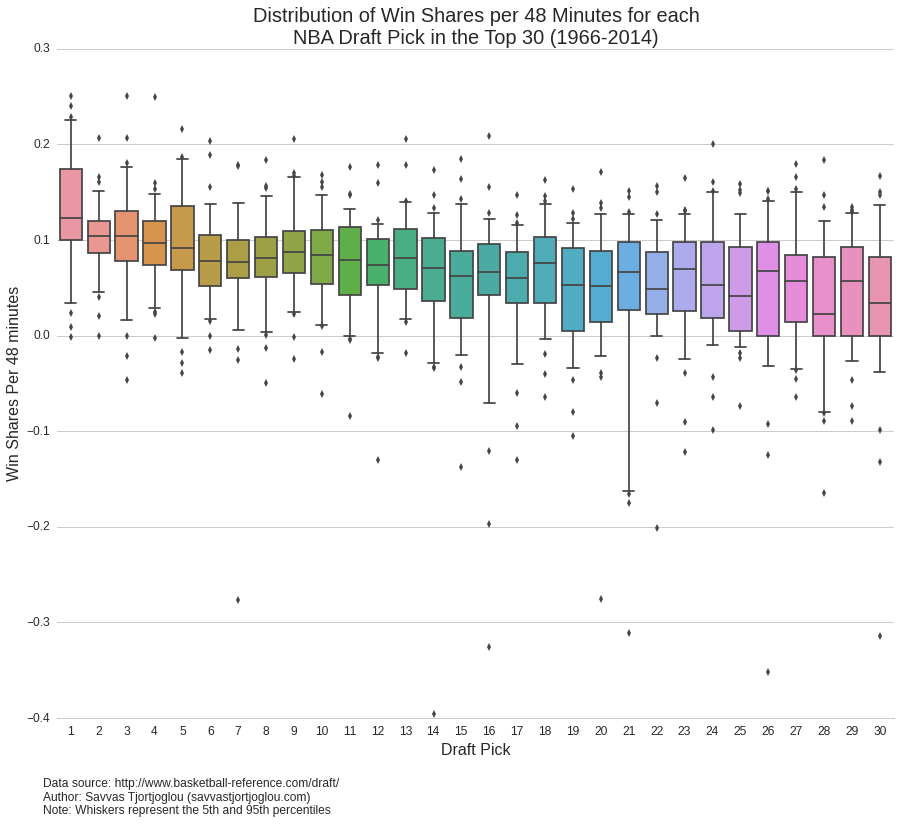

In [23]:
sns.set_style("whitegrid")

plt.figure(figsize=(15,12))

# create our boxplot which is drawn on an Axes object
bplot = sns.boxplot(x='Pk', y='WS_per_48', data=top30, whis=[5,95])

title = ('Distribution of Win Shares per 48 Minutes for each' 
         '\nNBA Draft Pick in the Top 30 (1966-2014)')

# We can call all the methods avaiable to Axes objects
bplot.set_title(title, fontsize=20)
bplot.set_xlabel('Draft Pick', fontsize=16)
bplot.set_ylabel('Win Shares Per 48 minutes', fontsize=16)
bplot.tick_params(axis='both', labelsize=12)

sns.despine(left=True) 

plt.text(-1, -.5, 
         'Data source: http://www.basketball-reference.com/draft/'
        '\nAuthor: Savvas Tjortjoglou (savvastjortjoglou.com)'
         '\nNote: Whiskers represent the 5th and 95th percentiles',
          fontsize=12)
plt.show()

Each box contains the inter-quartile range, which means the bottom of the box represents the 25th percentile and the top represents the 75th percentile.  The median is represented by the line within the box.  

By default in `seaborn` and `matplotlib`, each whisker extends out to 1.5 \* the closest quartile. So the top whisker line extends out 1.5 \* the value of the 75th percentile.  The dots that fall outside the whiskers are considered outliers.

However in our boxplot above, we set the whiskers to represent the 5th and 95th percentiles by setting the `whis` parameter to [5, 95]. The dots now represent outliers that fall within the top or bottom 5% of the distribution.

Lets get the top 5% for the 3rd overall draft pick.  To do this we get all 3rd overall picks, then get their *WS_per_48* and call the `quantile()` method. Passing in 0.95 into `quantile()` returns the *WS_per_48* value of the 95th percentile for all 3rd picks.

In [24]:
pick3_95 = top30[top30['Pk']==3]['WS_per_48'].quantile(0.95)
pick3_95

0.17839999999999998

Now to get the players that have a *WS_per_48* greater then about 0.1784

In [25]:
# Here we are accessing columns as attributes and then using
# Boolean operations

# Lets create a mask that contains our Boolean operations then index
# the data using the mask
mask = (top30.Pk == 3) & (top30.WS_per_48 > pick3_95)
pick3_top5_percent = top30[mask]

pick3_top5_percent[['Player', 'WS_per_48']]

,Player,WS_per_48
3092,Kevin McHale,0.180
4052,Michael Jordan,0.250
6080,James Harden,0.207


We can rewrite the above code using the `query()` method. To reference a local variable within our query string we must place '@' in front of its name. `pandas` also allows us to use English instead of symbols in our query string.

In [26]:
pick3_top5_percent = top30.query('Pk == 3 and WS_per_48 > @pick3_95')

pick3_top5_percent[['Player', 'WS_per_48']]

,Player,WS_per_48
3092,Kevin McHale,0.180
4052,Michael Jordan,0.250
6080,James Harden,0.207


###Violin Plots
Creating violin plots using `seaborn` is pretty much the same as creating a boxplot, but we use `seaborn.violinplot` instead of `seaborn.boxplot`.

In [27]:
top10 = top60[top60['Pk'] < 11]

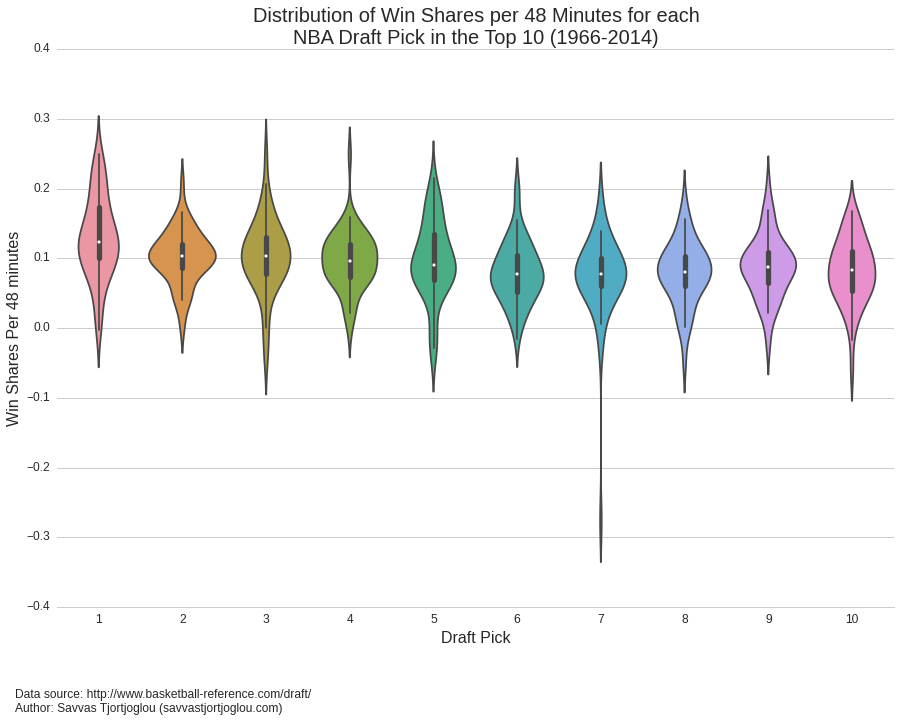

In [28]:
sns.set(style="whitegrid")

plt.figure(figsize=(15,10))

# create our violinplot which is drawn on an Axes object
vplot = sns.violinplot(x='Pk', y='WS_per_48', data=top10)

title = ('Distribution of Win Shares per 48 Minutes for each' 
         '\nNBA Draft Pick in the Top 10 (1966-2014)')

# We can call all the methods avaiable to Axes objects
vplot.set_title(title, fontsize=20)
vplot.set_xlabel('Draft Pick', fontsize=16)
vplot.set_ylabel('Win Shares Per 48 minutes', fontsize=16)
vplot.tick_params(axis='both', labelsize=12)

plt.text(-1, -.55, 
         'Data source: http://www.basketball-reference.com/draft/'
        '\nAuthor: Savvas Tjortjoglou (savvastjortjoglou.com)',         
          fontsize=12)

sns.despine(left=True) 
           
plt.show()

Each violin in the above plot actually contains a box plot, with white dot in the middle representing the median.

A violin plot is a combination of a boxplot and [kernel density estimate](https://en.wikipedia.org/wiki/Kernel_density_estimation). Instead of just having whiskers or dots to give us more information about the distribution of our data, the violin plot provides an estimated shape of the distribution.

###Software Versions

In [29]:
import sys
print('Python version:', sys.version_info)
import IPython
print('IPython version:', IPython.__version__)
import matplotlib as mpl
print('Matplotlib version:', mpl.__version__)
print('Seaborn version:', sns.__version__)
print('Pandas version:', pd.__version__)


Python version: sys.version_info(major=3, minor=4, micro=3, releaselevel='final', serial=0)
IPython version: 3.2.0
Matplotlib version: 1.4.3
Seaborn version: 0.6.0
Pandas version: 0.16.2


You can check out the ipython notebook and data used in this post at the github repo [here]((https://github.com/savvastj/NBA_stuff).